In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood-cells/dataset2-master/dataset2-master/labels.csv
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_6_1456.jpeg
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_9_1868.jpeg
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_10_6025.jpeg
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_3_6772.jpeg
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_1_2131.jpeg
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_3_6184.jpeg
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_3_5408.jpeg
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_3_3735.jpeg
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_14_6712.jpeg
/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_15_1656.jpe

In [2]:
import math, cv2, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dataset_path = "../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN"
test_dataset_path = "../input/blood-cells/dataset2-master/dataset2-master/images/TEST"
pred_dataset_path = "../input/blood-cells/dataset2-master/dataset2-master/images/TEST_SIMPLE"

IMG_SIZE      = 128
data_list     = os.listdir(train_dataset_path)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 32  
EPOCHS        = 25
CATEGORIES    = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
pred_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dataset_path,
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        shuffle=True,
        seed=None,
        class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        shuffle=True,
        seed=None,
        class_mode="categorical")


Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


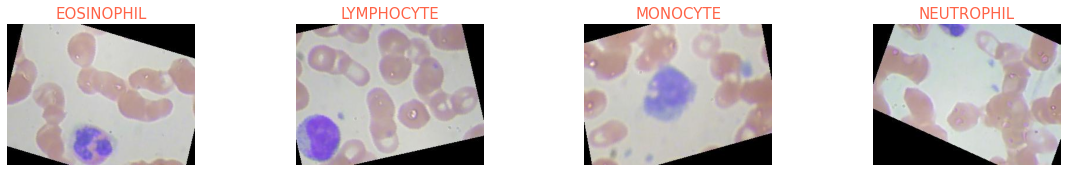

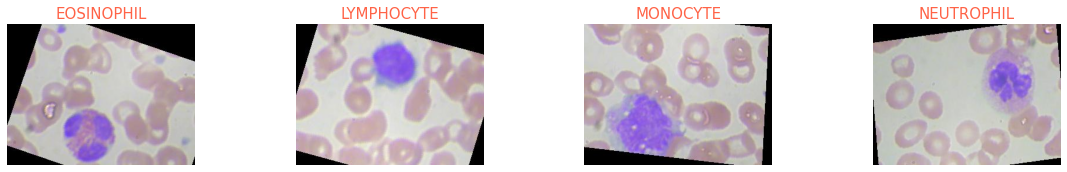

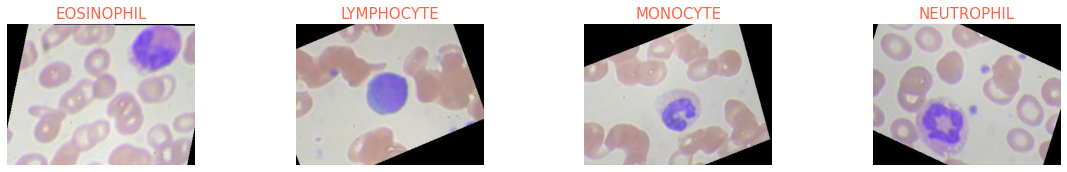

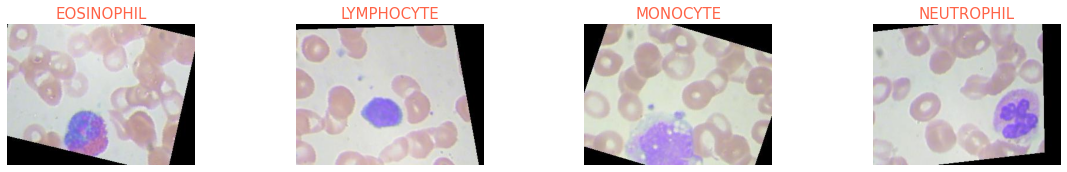

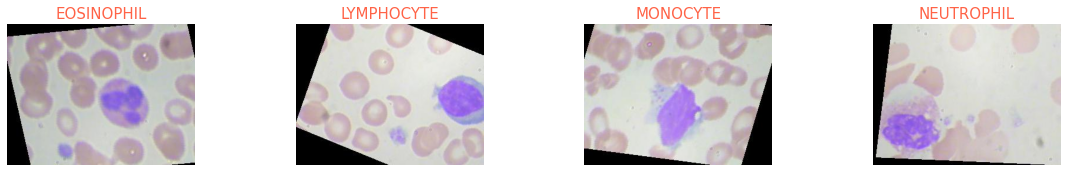

In [4]:

import matplotlib.pyplot as plt

for k in range(5):
    i=0
    plt.figure(figsize=(25,15))
    for category in CATEGORIES:
        plt.subplot(5, 5, i+1)
        plt.yticks([])
        plt.xticks([])
        path=train_dataset_path + '/' + category
        image_p=os.listdir(path)
        plt.title(category , color='tomato').set_size(15)
        plt.axis('off')
        image = cv2.imread(os.path.join(path, image_p[k])) 
        image = image[:, :, [2, 1, 0]] 
        plt.imshow(image)
        i+=1

In [5]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras import applications
import tensorflow as tf
from keras.models import Model




Using TensorFlow backend.


In [6]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape= (128,128,3))
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(128, activation='relu'))
add_model.add(Dense(64, activation='relu'))
add_model.add(Dense(4, activation='softmax'))
model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


87916544/87910968 [==============================] - 7s 0us/step


In [7]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 63, 63, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 63, 63, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [8]:
epoch = 15
STEP_SIZE_TRAIN=train_generator.n // train_generator.batch_size 
STEP_SIZE_VALID=test_generator.n // test_generator.batch_size
BATCH_SIZE    = 32 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN, 
      epochs=epoch,
      validation_data=test_generator,
      validation_steps=STEP_SIZE_VALID) 

Epoch 1/15
311/311 [==============================] - 115s 370ms/step - loss: 0.9238 - accuracy: 0.5568 - val_loss: 9.5072 - val_accuracy: 0.2731
Epoch 2/15
311/311 [==============================] - 69s 221ms/step - loss: 0.3767 - accuracy: 0.8487 - val_loss: 0.8345 - val_accuracy: 0.7735
Epoch 3/15
311/311 [==============================] - 70s 224ms/step - loss: 0.1858 - accuracy: 0.9353 - val_loss: 4.8522 - val_accuracy: 0.6187
Epoch 4/15
311/311 [==============================] - 67s 216ms/step - loss: 0.2071 - accuracy: 0.9338 - val_loss: 1.1032 - val_accuracy: 0.8281
Epoch 5/15
311/311 [==============================] - 69s 221ms/step - loss: 0.1001 - accuracy: 0.9711 - val_loss: 0.6162 - val_accuracy: 0.8314
Epoch 6/15
311/311 [==============================] - 68s 218ms/step - loss: 0.2701 - accuracy: 0.9228 - val_loss: 0.7906 - val_accuracy: 0.8049
Epoch 7/15
311/311 [==============================] - 72s 233ms/step - loss: 0.0785 - accuracy: 0.9731 - val_loss: 1.0069 - val_a

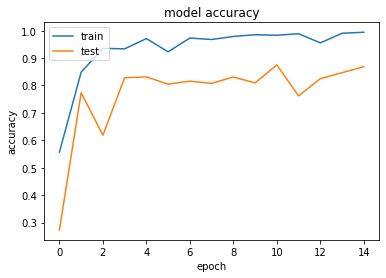

In [9]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()